In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('student-mat.csv', sep=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
scaler = MinMaxScaler()
scaler.fit(data[['G2']])
data['G2'] = scaler.transform(data[['G2']])
scaler.fit(data[['G3']])
data['G3'] = scaler.transform(data[['G3']])


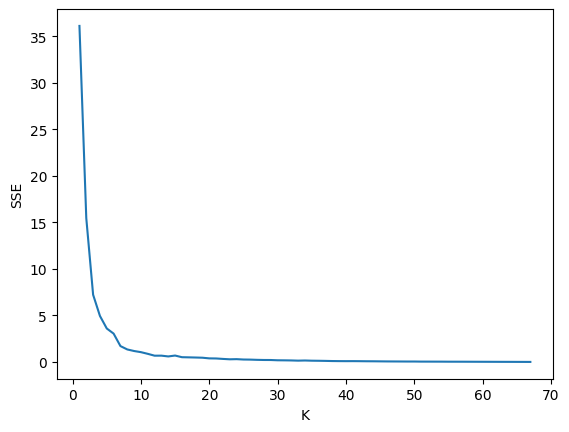

In [4]:
sse = []
k_rng = range(1,68)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['G2', 'G3']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng, sse)


In [5]:
km = KMeans(n_clusters=7)
y_predict = km.fit_predict(data[['G2', 'G3']])
data['cluster'] = y_predict
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,0.315789,0.30,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,0.263158,0.30,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,0.421053,0.50,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,0.736842,0.75,6
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,0.526316,0.50,2


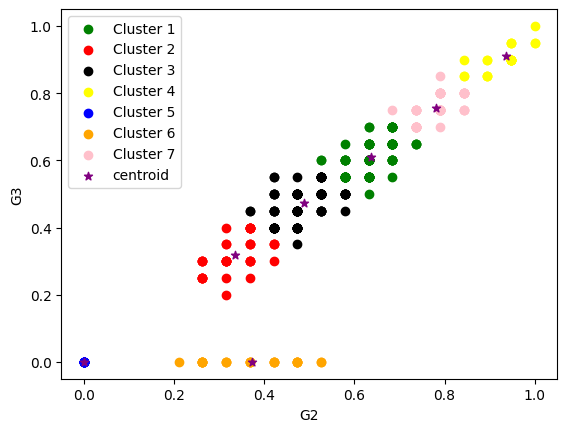

In [6]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data4 = data[data.cluster==3]
data5 = data[data.cluster==4]
data6 = data[data.cluster==5]
data7 = data[data.cluster==6]

plt.scatter(data1.G2, data1['G3'], color='green', label='Cluster 1')
plt.scatter(data2.G2, data2['G3'], color='red', label='Cluster 2')
plt.scatter(data3.G2, data3['G3'], color='black', label='Cluster 3')
plt.scatter(data4.G2, data4['G3'], color='yellow', label='Cluster 4')
plt.scatter(data5.G2, data5['G3'], color='blue', label='Cluster 5')
plt.scatter(data6.G2, data6['G3'], color='orange', label='Cluster 6')
plt.scatter(data7.G2, data7['G3'], color='pink', label='Cluster 7')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('G2')
plt.ylabel('G3')
plt.legend()